In [ ]:
# import os
# import pprint
# import tensorflow as tf

# if 'COLAB_TPU_ADDR' not in os.environ:
#   print('ERROR: Not connected to a TPU runtime; please see the first cell in this notebook for instructions!')
# else:
#   tpu_address = 'grpc://' + os.environ['COLAB_TPU_ADDR']
#   print ('TPU address is', tpu_address)

#   with tf.compat.v1.Session(tpu_address) as session:
#     devices = session.list_devices()
    
#   print('TPU devices:')
#   pprint.pprint(devices)

%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.2.0
Running on TPU  ['10.76.230.178:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.76.230.178:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.76.230.178:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
import keras
from IPython.display import SVG
from keras.optimizers import Adam
from keras.utils.vis_utils import model_to_dot


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Using TensorFlow backend.


In [ ]:
!wget http://www.occamslab.com/petricek/data/ratings.dat

--2020-06-29 21:04:37--  http://www.occamslab.com/petricek/data/ratings.dat
Resolving www.occamslab.com (www.occamslab.com)... 82.208.6.71
Connecting to www.occamslab.com (www.occamslab.com)|82.208.6.71|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 274354671 (262M) [text/plain]
Saving to: ‘ratings.dat’

ratings.dat         100%[===================>] 261.64M  1.09MB/s    in 4m 8s   

2020-06-29 21:08:45 (1.06 MB/s) - ‘ratings.dat’ saved [274354671/274354671]



In [ ]:
ratings_df = pd.read_csv('ratings.dat', names=['user_id', 'profile_id', 'rating'])

In [ ]:
ratings_df

,user_id,profile_id,rating
0,1,133,8
1,1,720,6
2,1,971,10
3,1,1095,7
4,1,1616,10
...,...,...,...
17359341,135359,215145,8
17359342,135359,215718,4
17359343,135359,218646,10
17359344,135359,218857,7


# Matrix factorization

In [ ]:
ratings_df = ratings_df[:100000]

In [ ]:
ratings_df.rating = ratings_df.rating / 10

In [ ]:
ratings_df['user_id'] = ratings_df['user_id'].astype(np.int64)
ratings_df['profile_id'] = ratings_df['profile_id'].astype(np.int64)

In [ ]:
train, test = train_test_split(ratings_df, test_size=0.3)

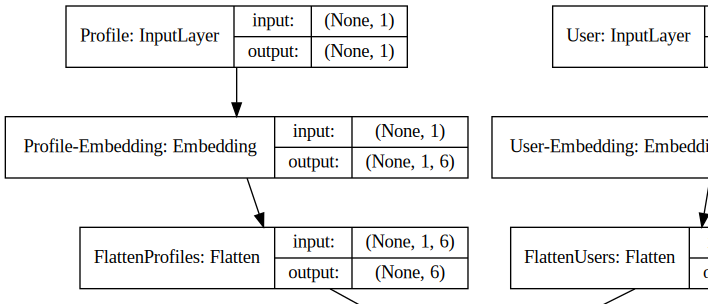

In [ ]:
n_users, n_profiles = max(ratings_df.user_id.unique()), max(ratings_df.profile_id.unique())
n_latent_factors = 6

profile_input = keras.layers.Input(shape=[1],name='Profile')
profile_embedding = keras.layers.Embedding(n_profiles + 1, n_latent_factors, name='Profile-Embedding')(profile_input)
profile_vec = keras.layers.Flatten(name='FlattenProfiles')(profile_embedding)

user_input = keras.layers.Input(shape=[1],name='User')
user_embedding = keras.layers.Embedding(n_users + 1, n_latent_factors,name='User-Embedding')(user_input)
user_vec = keras.layers.Flatten(name='FlattenUsers')(user_embedding)

prod = keras.layers.dot([profile_vec, user_vec],axes=1, name= 'DotProduct')

dense_1 = keras.layers.Dense(120, activation='relu', name='FullyConnected')(prod)
bn_1 = keras.layers.BatchNormalization()(dense_1)

dense_2 = keras.layers.Dense(100, activation='relu', name='FullyConnected-1')(bn_1)
bn_2 = keras.layers.BatchNormalization()(dense_2)

result = keras.layers.Dense(1, activation='sigmoid',name='Activation')(bn_2)

model = keras.Model([user_input, profile_input], result)
model.compile('adam', 'mean_squared_error')

SVG(model_to_dot(model,  show_shapes=True, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))

In [ ]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Profile (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
User (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
Profile-Embedding (Embedding)   (None, 1, 6)         1325724     Profile[0][0]                    
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 6)         4218        User[0][0]                       
____________________________________________________________________________________________

In [ ]:
history = model.fit([train['user_id'], train['profile_id']], train['rating'], epochs=4, verbose=1)

Epoch 1/4
70000/70000 [==============================] - 17s 247us/step - loss: 0.4327
Epoch 2/4
70000/70000 [==============================] - 17s 249us/step - loss: 0.2995
Epoch 3/4
70000/70000 [==============================] - 18s 255us/step - loss: 0.1521
Epoch 4/4
70000/70000 [==============================] - 18s 252us/step - loss: 0.0836


Text(0, 0.5, 'Train Error')

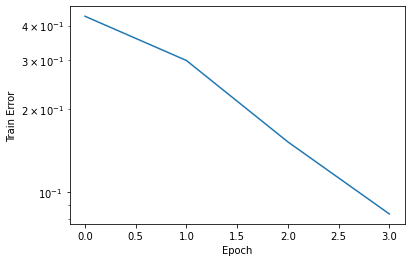

In [ ]:
pd.Series(history.history['loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")

In [ ]:
y_hat = np.round(model.predict([test.user_id, test.profile_id]) * 10, 0)
y_true = test.rating * 10

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true, y_hat)

3.1510333333333334